# 데이터분석의 모든 것_통계학기반 데이터분석 1강

### [실습1] t-검정 | 일표본 검증

In [1]:
import numpy as np
from scipy import stats

#### 일표본 t-test:
모집단의 알려진 평균과 표본의 평균을 비교하는 검정입니다.

In [24]:
# 데이터 준비
tree1_random = np.random.choice(400, size = 10, replace=True)
               # 0~399 수 중에서 랜덤으로 10개 추출. replace= False <--복원추출
print(tree1_random)
tree1_random.mean()

[ 52   2  76 149 203 263  77 200  75 332]
<class 'numpy.ndarray'>


142.9

In [10]:
# 귀무가설: 평균이 400이다   (모집단의 평균400과 샘플의 평균의 차이가 0이다.)
# 대립가설: 평균이 400이 아니다.

# 일표본 t-test
# print(stats.#TODO(tree1_random, 400, alternative='#TODO'))
print(stats.ttest_1samp(tree1_random, 400)) #1표본일 때 사용

TtestResult(statistic=-4.496969365053682, pvalue=0.0014954511696382488, df=9)


In [6]:
# 해석
# pvalue=0.0054  이므로  0.05보다 작으므로 귀무가설 기각. 대립가설 채택

### [실습2] t-검정 | 독립 이표본 (independent) 검증

두 집단이 서로 다른 모집단에서 추출된, 독립된 두 집단의 평균의 차이를 검정하는 것

In [11]:
### 데이터 준비
"""서울지역 12세 남학생들의 몸무게와 부산지역 12세 남학생 들의 몸무게를 측정했다. 다른 집단에서 각각 표본을 추출하였으므로 독립이표본이다.
두 집단의 몸무게 차이가 있는지,그 차이가 유의미한 차이가 t-검정을 해보자.
"""
Seoul = [43.12, 40.94, 42.36, 50.64, 50, 43.49, 43.72, 40.19, 46.6, 43.75,
         42.31, 44.7, 43.39, 33.08, 40.67, 49.5, 34.14, 40.61, 35.21, 37.91]
Busan = [41.74, 42.35, 40.62, 28.64, 49.64, 40.94, 43.25, 40.3, 56.03,43.77,
         51.3, 44.26, 42.6, 32.19, 39.72, 49.2, 33.03, 40.45, 36.03, 38.1]

In [12]:
# 귀무가설: 두 집단의 평균의 차이가 0이다.
# 대립가설: 두 집단의 평균의 차이가 0이 아니다.

### 독립 이표본 (independent) t-test
tTestResult = stats.ttest_ind(Seoul, Busan)

print(tTestResult)

TtestResult(statistic=0.3332423096643642, pvalue=0.7407831552749102, df=38.0)


In [13]:
# 해석
# 검정 결과 p-value는 0.7409이다.
# p-value가 0.05보다 작지 않으므로 귀무가설은 채택하고, 대립가설이 기각된다.
# 즉, 두 집단의 몸무게 차이는 유의미하지 않다.

### [실습3] t-검정 | 대응 이표본 검증     
두 집단이 서로 같은 모집단에서 추출된 대응된 두 집단의 평균의 차이를 검정하는 것

In [18]:
# 데이터 준비

np.random.seed(1)   # to get consistent result

# before treatment : mean 60, standard deviation 5
beforeWeights = [60 + np.random.normal(0, 5) for _ in range(20)]
# 다이어트약 임상 시험 대상자들의 몸무게

# after treatment : mean 0.99-fold decrease, standard deviation 0.02
afterWeights = [w * np.random.normal(0.99, 0.02) for w in beforeWeights]
# 다이어트약 복용 후, 임상 시험 대상자들의 몸무게

print( beforeWeights, '\n' ,afterWeights )

[68.1217268183162, 56.94121793174962, 57.359141238682724, 54.63515688921915, 64.3270381466234, 48.492306515598585, 68.7240588210824, 56.19396549552449, 61.59519548028549, 58.75314812261295, 67.31053968522487, 49.69929645251173, 58.38791397993246, 58.07972822665792, 65.66884721167719, 54.500543663429845, 59.13785896224782, 55.61070791039314, 60.21106873357797, 62.914076068579114] 
 [65.94098797171107, 57.67544499710449, 57.819839215935254, 54.63788246116392, 64.84275566541605, 47.34427263203588, 67.86790793112998, 54.58033393455883, 60.64923115285458, 58.78881770728494, 65.70631311881824, 48.80793606499072, 57.001583230054315, 56.517144665313666, 64.13055954741337, 53.94173367626836, 57.224973536332286, 55.315321289307555, 61.60772730564428, 63.218635763189475]


In [19]:
# 귀무가설: beforeWeights와 afterWeights의 차이가 0이다.
# 대립가설: beforeWeights와 afterWeights의 차이가 0이 아니다.

#  대응 이표본  t-test  (default : 양측검정)
tTestResult = stats.ttest_rel(beforeWeights, afterWeights)
print(tTestResult)

TtestResult(statistic=2.9154993563693186, pvalue=0.008871163766572827, df=19)


In [20]:
# 해석
# p-value < 0.05에서 귀무 가설을 기각한다.
# 즉, 다이어트 약 복용 전/후에 체중 차이는 유의미하다고 할 수 있다

In [26]:
## 참고
## 이 예제는 단측검정이 더 적합하다.

# 귀무가설: beforeWeights와 afterWeights의 차이가 0보다 크다
# 대립가설: beforeWeights와 afterWeights의 차이가 0보다 작다.

#  대응 이표본  t-test  (  단측검정)
tTestResult = stats.ttest_rel(beforeWeights, afterWeights, alternative="greater")
print(tTestResult)

TtestResult(statistic=2.9154993563693186, pvalue=0.004435581883286414, df=19)


### [실습4] F-검정 | 일원분산분석(One-way ANOVA)

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [18]:
# 분산분석에는 여러 종류가 있지만,
# 여기서는 일원분산분석(One-way ANOVA)과 이원분산분석(Two-way ANOVA)를 알아보겠다.
# 1) 일원분산분석(One-way ANOVA)
#  종속변인은 1개이며, 독립변인의 집단도 1개인 경우다.
#  한 가지 변수의 변화가 결과 변수에 미치는 영향을 보기 위해 사용된다.
# 파이썬에서 One-way ANOVA 분석은 scipy.stats이나 statsmodel 라이브러리를 이용해서 할 수 있다.
# statsmodel 라이브러리가 좀 더 많고 규격화된 정보를 제공한다.

# 예제) 22명의 심장 우회 수술을 받은 환자를 다음의 3가지 그룹으로 나누었다.
#  Group I  : 50% 아산화 질소(nitrous oxide)와 50%의 산소(oxygen) 혼합물을 24시간 동안 흡입한 환자
#  Group II : 50% 아산화 질소와 50% 산소 혼합물을 수술 받는 동안만 흡입한 환자
#  Group III : 아산화 질소 없이 오직 35-50%의 산소만 24시간 동안 처리한 환자
#  그런 다음 적혈구의 엽산 수치를 24시간 이후에 측정하였다.

[array([243., 251., 275., 291., 347., 354., 380., 392.]), array([206., 210., 226., 249., 255., 273., 285., 295., 309.]), array([241., 258., 270., 293., 328.])]


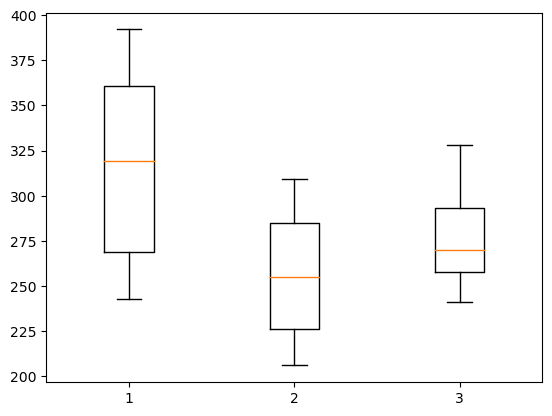

In [19]:
#  데이터 준비
import urllib  # url로 데이터 얻어오기
url = 'https://raw.githubusercontent.com/thomas-haslwanter/statsintro_python/master/ipynb/Data/data_altman/altman_910.txt'
data = np.genfromtxt(urllib.request.urlopen(url), delimiter=',')

# Sort them into groups, according to column 1
group1 = data[data[: ,1 ]==1 ,0]
group2 = data[data[: ,1 ]==2 ,0]
group3 = data[data[: ,1 ]==3 ,0]

# matplotlib plotting
plot_data = [group1, group2, group3]
print(plot_data)
ax = plt.boxplot(plot_data)
plt.show()

In [ ]:
# Boxplot에서 볼 수 있듯이, 평균값의 차이가 실제로 의미가 있는 차이인지,
# 분산이 커서 그런 것인지 애매한 상황이다.
# 이런 상황에서 분산분석을 통해 통계적 유의성을 알아 볼 수 있다.
# Scipy.stats으로 일원분산분석 : 아래와 같은 코드로 분산분석을 할 수 있다.


In [21]:
# 일원 분산 분석

# 귀무가설 : 세 그룹의 적혈구의 엽산 수치의 차이가 없다.
# 대립가설 : 세 그룹의 적혈구의 엽산 수치의 차이가 있다.

import scipy.stats as stats
f_statistic, pval = stats.f_oneway(group1, group2, group3)
print('Altman 910 데이터의 일원분산분석 결과 : F={0:.1f}, p={1:.5f}'.format(f_statistic, pval))  # F=3.7, p=0.04359

# 해석
if pval < 0.05:
    print("귀무가설 기각. 대립가설 채택")
    print('p-value 값이 유의수준 보다 작음으로 인해 세 그룹의 적혈구의 엽산 수치가 통계적으로 유의미하게 차이가 남.')

Altman 910 데이터의 일원분산분석 결과 : F=3.7, p=0.04359
귀무가설 기각. 대립가설 채택
p-value 값이 유의수준 보다 작음으로 인해 세 그룹의 적혈구의 엽산 수치가 통계적으로 유의미하게 차이가 남.


In [7]:
# 일원 분산 분석

# 이번에는 pandas와 statsmodels 라이브러리를 사용해서 분산분석을 수행.
# Statsmodel을 사용한 일원분산분석
import statsmodels.formula.api as smf
import statsmodels.api as sm

df = pd.DataFrame(data, columns=['value', 'treatment'])

# the "C" indicates categorical data
model = smf.#TODO('value ~ C(treatment)', df).fit()
print(sm.stats.#TODO(model))
# statsmodels 을 사용하면 간편하게 결과를 얻을 수 있다.

In [ ]:
## 문제 :
## iris.csv 파일을 읽고, 붓꽃의 품종(Name)별로 SepalWidth 가
## 통계학적으로 유의하게 차이가 나는지 일분분산분석하세요.

In [7]:
 # 답



### [실습5] f-검정 | 이원분산분석(One-way ANOVA)

In [ ]:
# 2) 이원분산분석(two-way ANOVA)  ---------------------------
# 독립변인의 수가 두 개 이상일 때 집단 간 차이가 유의한지를 검증하는 데 사용한다.
# 상호작용효과(Interaction effect), 한 변수의 변화가 결과에 미치는 영향이
# 다른 변수의 수준에 따라 달라지는지를 확인하기 위해 사용된다.
# 예제 데이터 설명
# 태아의 머리 둘레 측정 데이터다. 4명의 관측자가 3명의 태아를 대상으로 측정함.
# 이를 통해서 초음파로 태아의 머리 둘레측정 데이터가 재현성이 있는지를 조사함.

    head_size  fetus  observer
31       12.7    3.0       3.0
32       12.5    3.0       3.0
33       13.0    3.0       4.0
34       12.9    3.0       4.0
35       13.8    3.0       4.0


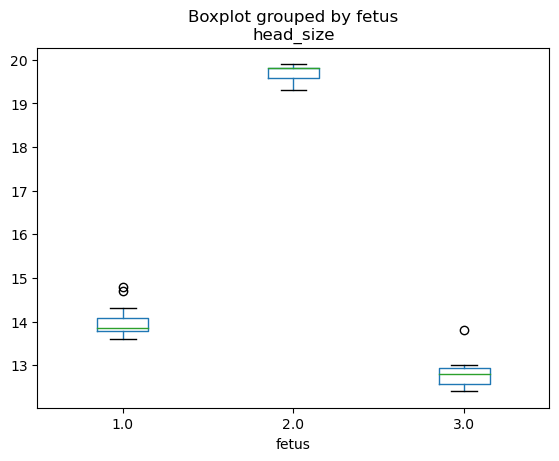

In [ ]:
# 데이터 준비

url_base = 'https://raw.githubusercontent.com/thomas-haslwanter/statsintro_python/master/ipynb/Data/data_altman/'
url = url_base + 'altman_12_6.txt'
data = np.genfromtxt(urllib.request.urlopen(url), delimiter=',')

# Bring them in dataframe-format
df = pd.DataFrame(data, columns=['head_size', 'fetus', 'observer'])
print(df.tail())

#     head_size  fetus  observer
# 31       12.7    3.0       3.0
# 32       12.5    3.0       3.0
# 33       13.0    3.0       4.0
# 34       12.9    3.0       4.0
# 35       13.8    3.0       4.0

# 태아별 머리 둘레 plot 만들기
df.boxplot(column = 'head_size', by='fetus' , grid = False)
plt.show()

In [8]:
# 태아(fetus) 3명의 머리둘레는 차이가 있어 보이나
# 이것이 관측자와 상호작용이 있는 것인지 분석을 통해 알아 보겠다.
# 분산분석으로 상관관계 확인: statmodels 라이브러리를 사용해 계산

#### 일원분산분석 C(fetus)
# 귀무가설 : 태아별  머리둘레의 크기는 차이가 없다.
# 대립가설 : 태아별  머리둘레의 크기는 차이가 있다.

#### 일원분산분석 C(observer)
# 귀무가설 : 관찰자별 태아측정 머리둘레의 크기는 차이가 없다.
# 대립가설 :  관찰자별 태아측정  머리둘레의 크기는 차이가 있다.

#### 이원분산분석 C(fetus):C(observer)
# 귀무가설 : 태아별 관측자별 그룹의 태아 머리둘레의 크기는 차이가 없다.
# 대립가설 : 태아별 관측자별 그룹의 태아 머리둘레의 크기는 차이가 있다.

formula = 'head_size ~ C(fetus) + C(observer) + C(fetus):C(observer)'
lm = smf.#TODO(formula, df).fit()  # 선형회귀를 이용
print(sm.stats.#TODO(lm))

In [ ]:
# 해설

#### 일원분산분석      C(fetus) p value=.051039e-27   귀무가설 기각
# 귀무가설 : 태아별  머리둘레의 크기는 차이가 없다.
# 대립가설 : 태아별  머리둘레의 크기는 차이가 있다.

#### 일원분산분석   C(observer) p value=.6.497055e-03  귀무가설 기각
# 귀무가설 : 관찰자별 태아측정 머리둘레의 크기는 차이가 없다.
# 대립가설 :  관찰자별 태아측정  머리둘레의 크기는 차이가 있다.

####이원분산분석   C(fetus):C(observer) p value= 3.295509e-01  귀무가설 채택
# 귀무가설 : 태아별 관측자별 그룹의 태아 머리둘레의 크기는 차이가 없다.
# 대립가설 : 태아별 관측자별 그룹의 태아 머리둘레의 크기는 차이가 있다

        # p-value 가 0.05 보다 크다. 따라서 귀무가설을 기각할 수 없고,
        # 측정자와 태아의 머리 둘레값에는 연관성이 없다고 할 수 있다.
        # 측정하는 사람이 달라도 머리 둘레값은 일정하다는 얘기.

# 해설 : 초음파로 측정하는 태아의 머리 둘레값은 믿을 수 있다고 판단할 수 있다.